In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fnmatch
import os
import re

In [3]:
am_joint = pd.read_csv('./res_AM/res_AM_joint.csv')
am_joint_xyz = pd.read_csv('./res_AM/res_AM_joint_xyz.csv')
am_leg = pd.read_csv('./res_AM/res_AM_leg.csv')

# print(teste)

am_joint_dist = np.array(am_joint['Distance [mm]'])
am_joint_absB = np.array(am_joint['Mag_B [tesla]'])
am_jointXYZ_dist = np.array(am_joint_xyz['Distance [mm]'])
am_jointXYZ_absB = np.array(am_joint_xyz['Mag_B [tesla]'])
am_leg_dist = np.array(am_leg['Distance [mm]'])
am_leg_absB = np.array(am_leg['Mag_B [mTesla]'])

# plt.plot(am_dist, am_absB)
# am_joint_absB

In [5]:
# Opening first the mesh_3d results

def getElmerRes(folder_name, in_file_name):
    
    file_pre = in_file_name + '*'
    
    file_names = fnmatch.filter(os.listdir(folder_name), file_pre)

    file_name = [get_name for get_name in file_names if not('.names' in get_name)]

    matrix = np.empty((0,),float)

    for idx_fn in range(len(file_name)):

        with open('./' + folder_name + '/' + file_name[idx_fn], 'r') as f:
            res_file = f.read()

        pattern1 = '   ' # space patter used to delimit values
        pattern2 = '  ' # space patter used to delimit values
        spc_pattern = ' '
        brk_pattern = '\n'

        # There are different patterns, easier to convert them to a single space
        res_file = re.sub(pattern1, spc_pattern, res_file)
        res_file = re.sub(pattern2, spc_pattern, res_file)

        iter_ln_vector = re.finditer(brk_pattern, res_file) # ln -> line

        idx_ln = 0
        ini_str = 0

        # values = np.zeros((9,),float)

        for iter_ln_val in iter_ln_vector:
            end_str = iter_ln_val.start()
            # print(end_str)    
            str_ln = res_file[ini_str:end_str]
            # print(str_ln) # Here I am breaking the lines into strings
            ini_str = end_str + 1

            iter_vl_vector = re.finditer(spc_pattern, str_ln) # vl -> value
            
            str_vl_vec = str_ln.split()
            # print(float(str_vl_vec[0]))

            values = np.empty((0,),float)

            for idx_value in range(len(str_vl_vec)):
                # values[idx_value] = float(str_vl_vec[idx_value])
                values = np.append(values,float(str_vl_vec[idx_value]))
                # print(values.shape)
            
            # The matrix is created empty. So, its size can be used as a test so I don't need to specify it priorly. 
            matrix = values.reshape(1,len(str_vl_vec)) if matrix.size == 0 else np.append(matrix,values.reshape(1,len(str_vl_vec)),axis=0)
            
    return matrix[matrix[:,2].argsort()]


In [6]:

def calcDistB(matrix):
    x = matrix[:,3]
    y = matrix[:,4]
    z = matrix[:,5]
    Bx = matrix[:,6]
    By = matrix[:,7]
    Bz = matrix[:,8]

    ef_dist = np.sqrt((x - x[0])**2 + (y - y[0])**2 + (z - z[0])**2)
    ef_absB = np.sqrt(Bx**2 + By**2 + Bz**2)

    return ef_dist, ef_absB

In [27]:
folder_name = 'res_lin_iter_v1'

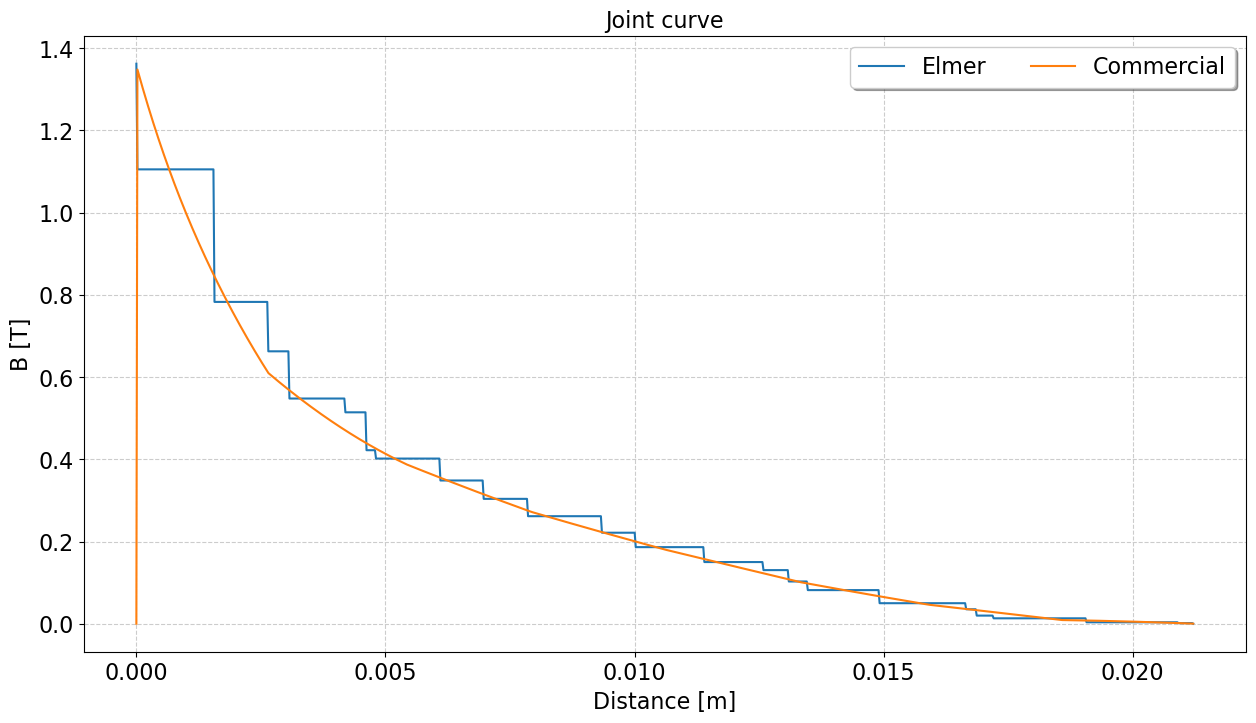

In [29]:
file_name = 'bh_line_joint.dat'

matrix_joint = getElmerRes(folder_name, file_name)
ef_joint_dist, ef_joint_absB = calcDistB(matrix_joint)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ef_joint_dist, ef_joint_absB, label = 'Elmer')
ax.plot(am_joint_dist*1e-3, am_joint_absB, label = 'Commercial')
ax.legend(fontsize = 16, ncol = 2, loc="upper right", fancybox=True, shadow=True)

ax.set_title('Joint curve', fontsize = 16)

ax.set_xlabel('Distance [m]', fontsize = 16)
ax.set_ylabel('B [T]', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)

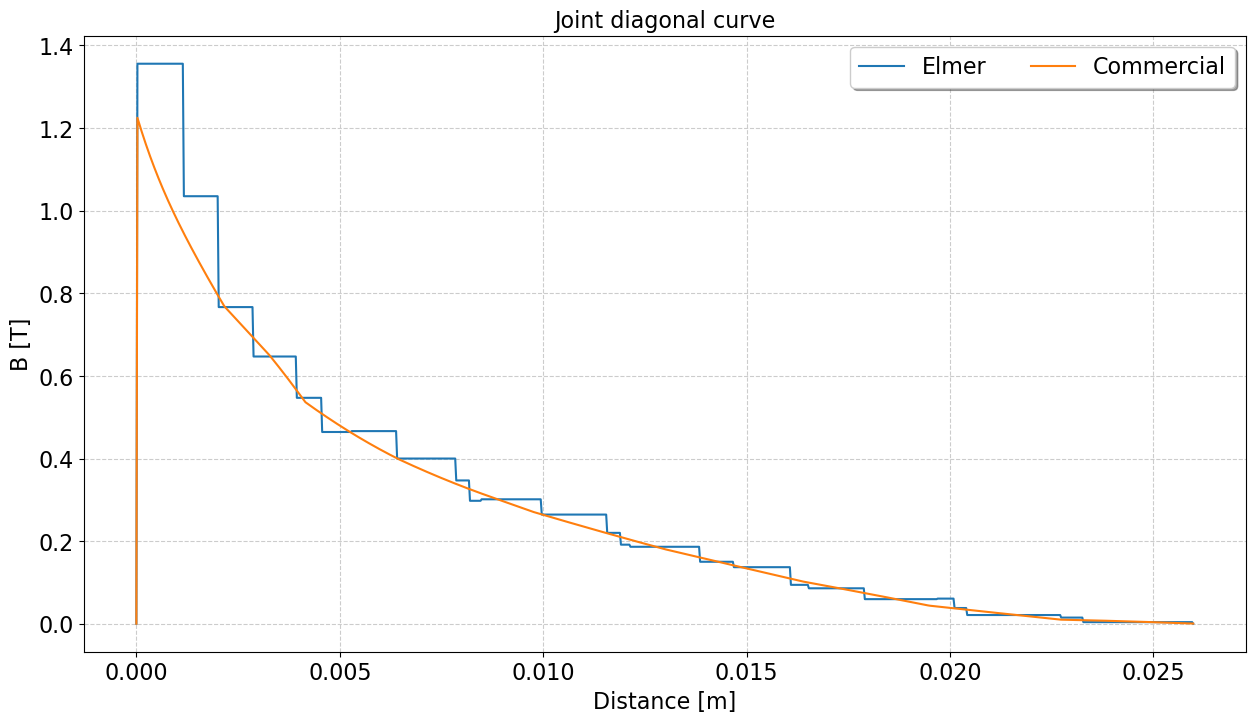

In [30]:
file_name = 'bh_line_joint_xyz.dat'

matrix_joint = getElmerRes(folder_name, file_name)
ef_jointXYZ_dist, ef_jointXYZ_absB = calcDistB(matrix_joint)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ef_jointXYZ_dist, ef_jointXYZ_absB, label = 'Elmer')
ax.plot(am_jointXYZ_dist*1e-3, am_jointXYZ_absB, label = 'Commercial')
ax.legend(fontsize = 16, ncol = 2, loc="upper right", fancybox=True, shadow=True)

ax.set_title('Joint diagonal curve', fontsize = 16)

ax.set_xlabel('Distance [m]', fontsize = 16)
ax.set_ylabel('B [T]', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)

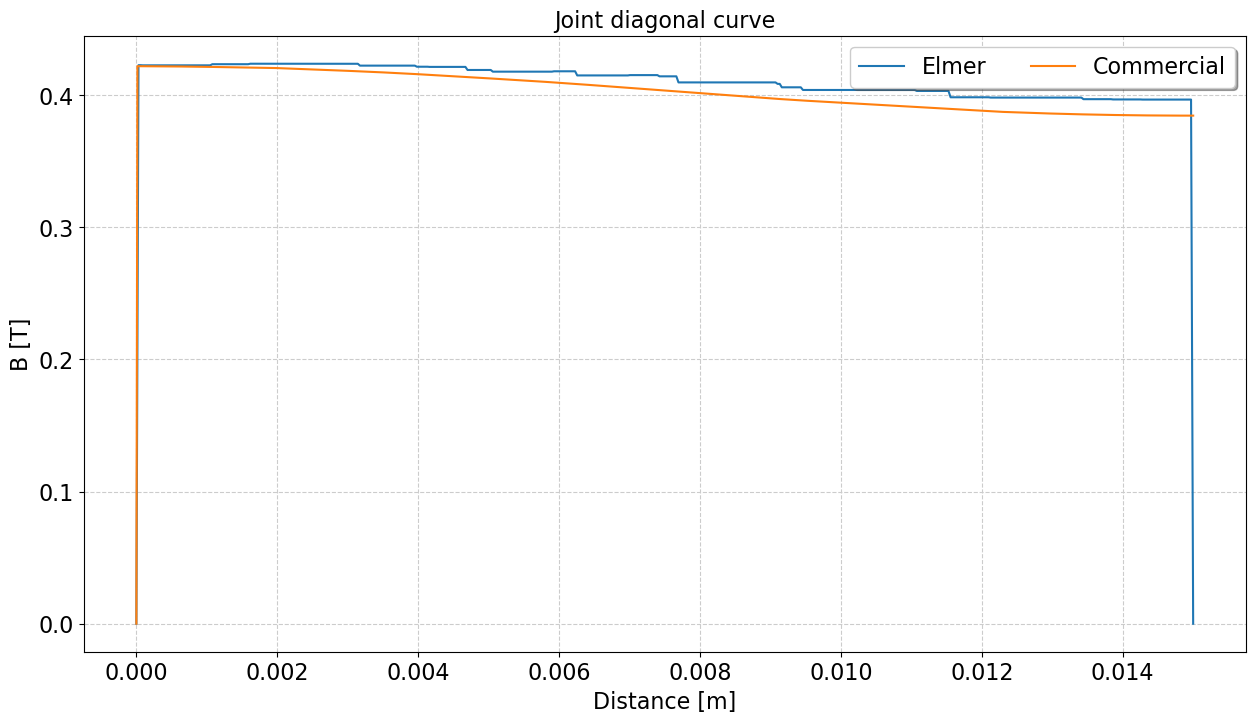

In [26]:
file_name = 'bh_line_leg.dat'

matrix_leg = getElmerRes(folder_name, file_name)
ef_leg_dist, ef_leg_absB = calcDistB(matrix_leg)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ef_leg_dist, ef_leg_absB, label = 'Elmer')
ax.plot(am_leg_dist*1e-3, am_leg_absB*1e-3, label = 'Commercial')
ax.legend(fontsize = 16, ncol = 2, loc="upper right", fancybox=True, shadow=True)
# ax.set_ylim(0.13,0.14)

ax.set_title('Joint diagonal curve', fontsize = 16)

ax.set_xlabel('Distance [m]', fontsize = 16)
ax.set_ylabel('B [T]', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)